# Introduction to Finite Differences

In this chapter we are going to introduce the concept of Finite Differences (FD).
FD is a technique to discretize derivatives, a simple way to approximate differential equations. The idea  behind this method comes directly from the definition of derivative:

$$
\begin{equation}
f'(x)=\lim_{h\to 0} \frac {f(x+h)-f(x)}{h}
\end{equation}
$$

Defining a discrete value for $h$, we obtain the following approximation for the derivative:

<a id='Eq=forwardDifference'></a>

$$
\begin{equation}
f'(x)= \frac {f(x+h)-f(x)}{h}
\end{equation}
$$

In the previous equation we introduced the forward scheme to compute finite differences. The approximation we just made is extremely powerful, in fact it allows us to translate the language of physics, that is populated with differential equations and continuous functions, to the computational language, that is able to handle discrete quantities and perform operations between arrays at an impressive speed.

However, the approximation we just made comes with a price, that is an error we are introducing in the solution $f'$

Let's move already on a hands on visualization of this phenomenon, before describing the more mathematically rigorous formulation of FD using Taylor Series Expansion.

Imagine we are handling data from a sensor, $f(t)$, and we only have a discrete amount of measures, N, of a variable we are interested in (for example the Temperature that comes from a thermocouple, $T=f(t)$). The function $f(t)$, for the sake of simplicity, is the function $f(t)=sin(t)$, and hence its derivative computed analytically is $f'(t)=cos(x)$

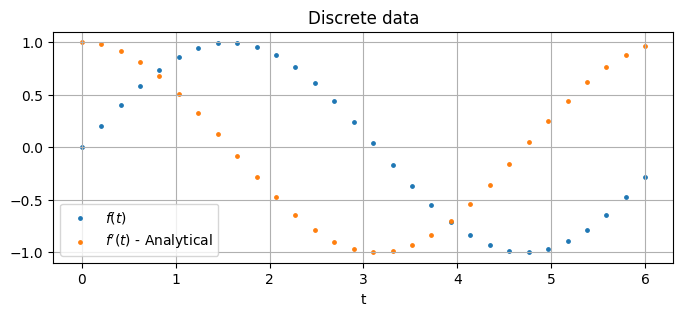

In [18]:
import numpy as np
import matplotlib.pyplot as plt

N = 30 #number of samples of the sensor
t = np.linspace(0, 6, N)
f = np.sin(t)
df_dt = np.cos(t)

plt.figure(figsize=(8,3))
plt.scatter(t, f, s=6)
plt.scatter(t, df_dt, s=6)
plt.xlabel('t')
plt.title('Discrete data')
plt.legend(["$f(t)$", "$f'(t)$ - Analytical"])
plt.grid()

plt.show()

Now it is interesting to compute the derivative of the function $f(t)$ using the [Forward Fifferences](#Eq=forwardDifference) method illustrated before. The solution computed analytically can be used as a comparison.

This approach could look aimless for who is at the first approaches with numerical methods. Using a simple function like $sin(t)$ to test our algorithm allows us to compare the approximate method (in this case the forward difference computation of the first derivative) with a solution that we already know. If the method was perfectly accurate, we would obtain as a solution $f'=cos(x)$, but we will see soon that the formulation contains an intrinsic error (remember that we committed a crime against the mathematical definition of the first derivative).

Let's see how the discrete solution looks:

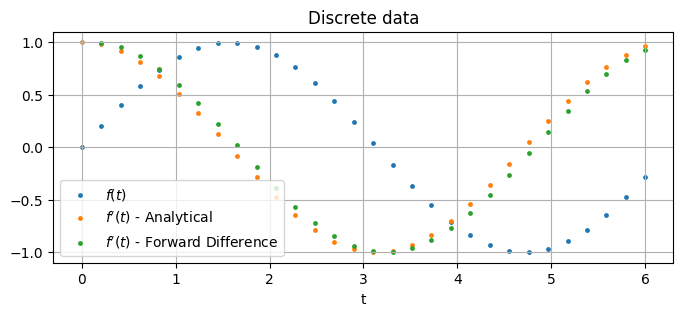

In [23]:
h = t[1] - t[0]  # h is the grid spacing, uniform in this case.
df_dt_forwardDiff = np.diff(f)/h # note that np.diff returns a vector of size N-1

## plot the results for comparison
plt.figure(figsize=(8,3))
plt.scatter(t, f, s=6)
plt.scatter(t, df_dt, s=6)
plt.scatter(t[1:], df_dt_forwardDiff, s=6)
plt.xlabel('t')
plt.title('Discrete data')
plt.legend(["$f(t)$", "$f'(t)$ - Analytical", "$f'(t)$ - Forward Difference"])
plt.grid()

As expected, the approximate method introduces an error in the prediction of the derivative.
One thing we could try to reduce the error is to increase the number of samples N (referring to the example of the thermocouple, it corresponds to buy a sensor with a higher sampling frequency).
In the following lines we will repeat the computations with N=100.

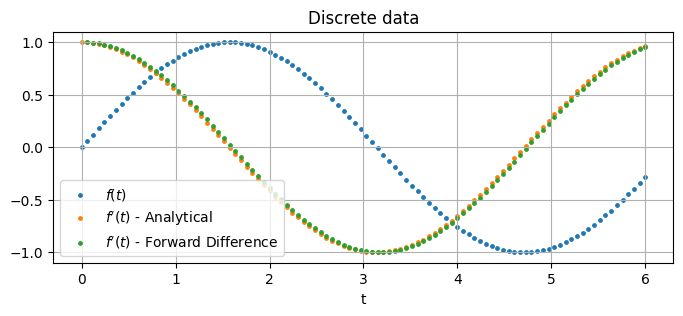

In [24]:
N = 100 #number of samples of the sensor
t = np.linspace(0, 6, N)
f = np.sin(t)
df_dt = np.cos(t)
h = t[1] - t[0]  # h is the grid spacing, uniform in this case.
df_dt_forwardDiff = np.diff(f)/h # note that np.diff returns a vector of size N-1

## plot the results for comparison
plt.figure(figsize=(8,3))
plt.scatter(t, f, s=6)
plt.scatter(t, df_dt, s=6)
plt.scatter(t[1:], df_dt_forwardDiff, s=6)
plt.xlabel('t')
plt.title('Discrete data')
plt.legend(["$f(t)$", "$f'(t)$ - Analytical", "$f'(t)$ - Forward Difference"])
plt.grid()
plt.show()

Now the prediction seems more precise. With this example we had an intuition of what happens when $h$ get closer to $0$. Diminishing this value in fact, we are getting closer to the mathematical exact definition, hence it makes sense that the error we obtain decreases.

In the following paragraph we will derive different FD schemes using Taylr series expansion, that allows to focus on the discretization error mathematical formulation.

## Taylor Series Expansion
The Taylor Series is an expansion of a function about one point, using an infinite sum of terms based on the derivatives of the function. It can be expressed as:

$$
f(x) = f(x_0) + h\cdot \left( \frac{\partial f}{\partial x} \right)_{x_0} + \frac{h^2}{2!}\cdot \left( \frac{\partial ^2 f}{\partial x^2} \right)_{x_0} + ... + \frac{h^n}{n!}\cdot \left( \frac{\partial ^n f}{\partial x^n} \right)_{x_0} + O\left( h^{n+1} \right)
$$

By truncating this expression at the first order ($n=1$) we obtain the expression:

$$
f(x) = f(x_0) + h\cdot \left( \frac{\partial f}{\partial x} \right)_{x_0} + O\left( h^2 \right)
$$

Isolating the term that represents the first derivative, we obtain:

$$
\left( \frac{\partial f}{\partial x} \right)_{x_0} = \frac{f(x) - f(x_0)}{h} + O\left( h \right)
$$

That is a more accurate expression of the equation we obtained in the first place. This time we also have a quantification of the error we are introducing with the approximation, and from now on we will refer to it as *discretization error*.

## Forward, Backward, and Centered difference
Using the Taylor Series expansion, we can manipulate the equations to obtain different expressions for the derivatives.

As we showed in the first codes in this chapter, the discretization techniques makes sense to handle continuous functions with computers, that means dispose of a finite number of points where we can evaluate the functions. In Computational Fluid Dynamics (CFD), we have to handle with the Navier Stokes Equations (NS), that describe the continuous mechanics (and guess what, they are defined for continuous functions). These equations, that we will handle in detail later in the book, have no analytical solution if not for some specific cases. These cases, moreover, do not arouse particular interest in practical applications.
The discrete methods to approximate derivatives seems to be an interesting way to solve the NS, and in fact represents the basis of most commercial codes for Fluid Dynamics applications.

To be able to solve continuous equations using these methods, i.e. the Finite Differences we just talked about, we need to divide the space we are interested in a finite number of points. The following picture shows an example of a numerical grid used to compute airfoils external aerodynamics:

![airfoilMesh.png](https://i0.wp.com/blog.gridpro.com/wp-content/uploads/2017/10/img5.png?resize=700%2C424)

Every intersection of the lines represents a node. All the nodes represents our computatioinal mesh, also called grid or meshgrid. If we consider the FD method, we will evaluate the funcion in the nodes defined by the grid. 

At this point, we are introducing an hypothesis that will be used for the entire duration of the book. Since the focus of the lectures doesn't want to be the mesh generation, that would complicate consistently the coding and generalization of the algorithms, together with the form of the equations, we will from now on consider equispaced grids. We will start with the one-dimensional case, and continue with the two dimensional case.

This approximation will not allow our codes to work with complex geometries or with external aerodynamics problems, but we will be able to solve free shear flows (e.g. jets), or internal flows. The increased simplicity of the equations will allow the readers to focus more on the fundamental concepts that will be treated in the book.